<a href="https://colab.research.google.com/github/EricMaciasE/Redes/blob/main/RedesPeso_Dirigidas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd

In [ ]:
uploaded = files.upload()

Saving comtrade_trade_data_total_2003.csv to comtrade_trade_data_total_2003.csv


In [ ]:
paises= files.upload()

Saving Country Code and Name ISO2 ISO3.csv to Country Code and Name ISO2 ISO3.csv


In [ ]:
datos = pd.read_csv('comtrade_trade_data_total_2003.csv', header=0, usecols = ['Reporter Code','Trade Flow Code','Partner Code','Value'])

In [ ]:
paises = pd.read_csv('Country Code and Name ISO2 ISO3.csv')

In [ ]:
excluir = [472,899,471,129,221,97,697,492,838,473,536,637,290,527,577,490,568,636,839,879,0]

In [ ]:
condicion = (datos['Reporter Code'].isin(excluir))| (datos['Partner Code'].isin(excluir))|(datos['Reporter Code'] == datos['Partner Code'])
datos = datos[~condicion]

In [ ]:
datos

,Reporter Code,Trade Flow Code,Partner Code,Value
3,8,1,12,179812
4,8,1,16,4083
5,8,1,20,7459
6,8,2,24,17517
7,8,1,28,62789
...,...,...,...,...
44253,876,1,788,8240
44254,876,1,792,1254
44255,876,1,818,855
44256,876,1,826,267747


In [ ]:
exportaciones=datos[datos['Trade Flow Code']==2]


In [ ]:
importaciones=datos[datos['Trade Flow Code']==1]


In [ ]:
enlaces_in=importaciones.groupby(['Reporter Code','Partner Code'])['Value'].sum().reset_index()

In [ ]:
enlaces_out=exportaciones.groupby(['Reporter Code','Partner Code'])['Value'].sum().reset_index()

In [ ]:
enlaces_in.columns = ['origen','destino','valor']
enlaces_in

,origen,destino,valor
0,8,12,179812
1,8,16,4083
2,8,20,7459
3,8,28,62789
4,8,32,814081
...,...,...,...
23059,894,862,40024
23060,894,876,872
23061,894,882,248
23062,894,887,13227


In [ ]:
enlaces_out.columns = ['origen','destino','valor']
enlaces_out

,origen,destino,valor
0,8,24,17517
1,8,28,4883
2,8,32,153
3,8,36,104
4,8,40,5550225
...,...,...,...
20053,894,818,1042737
20054,894,826,254063671
20055,894,834,122718598
20056,894,842,6904627


In [ ]:
enlaces = enlaces_out.append(enlaces_in,ignore_index = True,sort = False)

In [ ]:
enlaces

,origen,destino,valor
0,8,24,17517
1,8,28,4883
2,8,32,153
3,8,36,104
4,8,40,5550225
...,...,...,...
43117,894,862,40024
43118,894,876,872
43119,894,882,248
43120,894,887,13227


In [ ]:
enlaces_sim=enlaces.groupby(['origen','destino'])['valor'].mean().reset_index()

In [ ]:
enlaces_sim

,origen,destino,valor
0,8,12,179812.0
1,8,16,4083.0
2,8,20,7459.0
3,8,24,17517.0
4,8,28,33836.0
...,...,...,...
25284,894,862,40024.0
25285,894,876,872.0
25286,894,882,248.0
25287,894,887,13227.0


In [ ]:
DG = nx.DiGraph()

In [ ]:
edges = zip(enlaces_sim.origen.values, enlaces_sim.destino.values,enlaces_sim.valor.values)

In [ ]:
DG.add_weighted_edges_from(edges)

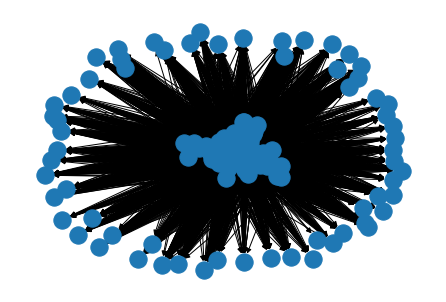

In [ ]:
nx.draw(DG)

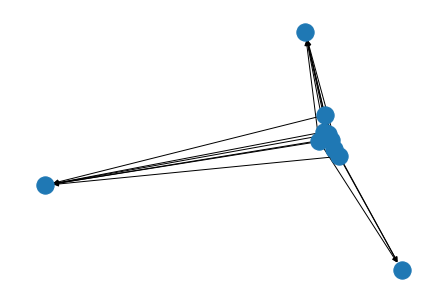

In [ ]:
nodos = list(DG.nodes())
nx.draw(DG.subgraph(nodos[:10]))

In [ ]:
grados_in=list(dict(DG.in_degree).values())

In [ ]:
grados_out=list(dict(DG.out_degree).values())

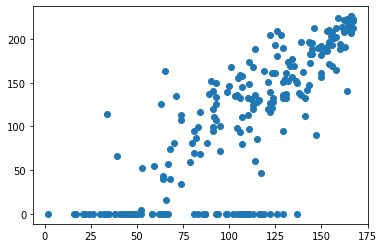

In [ ]:
plt.plot(grados_in,grados_out,'o')

In [ ]:
digri = list(dict(DG.degree).values())
mean_deg = []
for j in DG.nodes():
  vecinos = list(DG[j])
  degs = []
  for i in vecinos:
    degs.append(DG.degree[i])
  mean_deg.append(np.mean(degs))

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
